In [1]:
!pip install pynput
!pip install pyautogui
!pip install pytesseract
!pip install opencv-python
!pip install keyboard

In [2]:
import pyautogui
import tkinter as tk

# 마우스 좌표를 실시간으로 확인하는 함수
def update_coordinates():
    x, y = pyautogui.position()  # 현재 마우스 좌표 얻기
    label.config(text=f"현재 마우스 좌표: ({x}, {y})")
    label.after(100, update_coordinates)  # 100ms마다 좌표 업데이트

# Tkinter GUI 설정
root = tk.Tk()
root.title("마우스 좌표 확인")

# 현재 마우스 위치 얻기
mouse_x, mouse_y = pyautogui.position()

# Tkinter 창의 위치 설정
# "+x+y" 형식으로 좌표 지정
root.geometry(f"+{mouse_x}+{mouse_y}")

label = tk.Label(root, text="현재 마우스 좌표: (0, 0)", font=("Arial", 14))
label.pack(pady=20)

# 좌표 업데이트 함수 호출
update_coordinates()

root.mainloop()

In [ ]:
        # 마우스 이동 및 클릭
        if not mouse_moved:
            mouse_controller.position = (635, -649)  # 원하는 좌표로 변경
            time.sleep(random.uniform(0.1, 0.2))
            mouse_controller.click(mouse.Button.left, 1)
            time.sleep(random.uniform(0.1, 0.2))
            mouse_moved = True

In [1]:
from image_utils import *

In [73]:
game_region = (430, 50, 1272, 950)
hpmp_region = (1500, 851, 176, 50)
kingq_region_cut = (360,250,400,320)

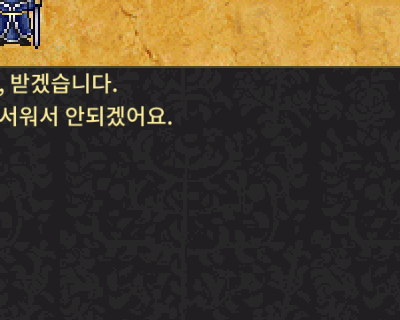

In [78]:
screenshot = pyautogui.screenshot(region=game_region, allScreens=True)
screenshot_cut = capture_and_crop(screenshot, kingq_region_cut)
screenshot_cut

In [10]:
screenshot = pyautogui.screenshot(region=game_region, allScreens=True)
king_coord = image_detection(screenshot, ['king.png'], 0.7, show=False)

target_x = game_region[0] + king_coord[0][0]
target_y = game_region[1] + king_coord[0][1]

pyautogui.moveTo(target_x, target_y, duration=0.1)  # 마우스 이동 (0.5초 동안 이동)
pyautogui.click()
pyautogui.moveTo(game_region[0], game_region[1], duration=0.1)  # 마우스 이동 (0.5초 동안 이동)

extracted_text = extract_text_from_image(game_region, cut_region=kingq_region_cut, config=r'--oem 1 --psm 6')

NameError: name 'kingq_region_cut' is not defined

In [75]:
extracted_text = extract_text_from_image(game_region, cut_region=kingq_region_cut, config=r'--oem 1 --psm 6')
extracted_text.replace(' ','')

'무례하게폐하께직접!폐하께__\n전할말씀은나를통해서하시오!\n'

In [76]:
extracted_text = extract_text_from_image(game_region, cut_region=kingq_region_cut, config=r'--oem 1 --psm 6')
extracted_text.replace(' ','')

'폐하께임무를받으려고하시는\n\n겁니까?임무를완수하면많은\n\n경험치를받으시겠지만,하지\n못하면형벌을받게된다오!\n《\n\n가래0.\n'

In [85]:
extracted_text = extract_text_from_image(game_region, cut_region=kingq_region_cut, config=r'--oem 1 --psm 6')
extracted_text.replace(' ','')

',받겠습니다.\n서워서안되겠어요.\n'

In [84]:
extracted_text = extract_text_from_image(game_region, cut_region=kingq_region_cut, config=r'--oem 1 --psm 6')
extracted_text.replace(' ','')

"어명이오!달갈귀신을잡으라는1:\n메하의말씀이계쳤소!림무를.\n스행한흐에는'시간을:게|증1\n수행한후에는시간을지체하지\n말고바로황궁으로돌아오시오!\n"

In [80]:
extracted_text = extract_text_from_image(game_region, cut_region=kingq_region_cut, config=r'--oem 1 --psm 6')
extracted_text.replace(' ','')

'네이놈!사령을잡을어명을(\n받고서사령을잡지않았구나!\n、\n:수\n아혼다다들아았다개\n'

In [81]:
extracted_text = extract_text_from_image(game_region, cut_region=kingq_region_cut, config=r'--oem 1 --psm 6')
extracted_text.replace(' ','')

'무를취소시켜주십시오.\n무를완수하고다시오겠습니다.\n'

In [82]:
extracted_text = extract_text_from_image(game_region, cut_region=kingq_region_cut, config=r'--oem 1 --psm 6')
extracted_text.replace(' ','')

'감히폐하의임무를(\n취소해달라고?이놈에게형벌을\n가하라!\n'

In [83]:
extracted_text = extract_text_from_image(game_region, cut_region=kingq_region_cut, config=r'--oem 1 --psm 6')
extracted_text.replace(' ','')

'이형벌로너의임무가(\n지워졌으니,다시임무를받을수\n있을것이다.\n`\n:수\n아혼다다들아았다개\n'

In [46]:
['무례', '폐하께', '어요', '명', 'target', '다시', '취소', '형벌']

'네이놈!처녀귀신을.잡을어명을\n받고서처녀귀신을잡지\n않았구나!\n'

In [ ]:

def extract_coor():
    global modified_image1, modified_image2
    # 전처리된 이미지
    preprocessed_image = preprocess_image(modified_image1, scale=5)

    # OCR을 사용하여 텍스트 추출
    extracted_text1 = pytesseract.image_to_string(preprocessed_image, lang='kor', config=config)
    
    # 전처리된 이미지
    preprocessed_image = preprocess_image(modified_image2, scale=5)

    # OCR을 사용하여 텍스트 추출
    extracted_text2 = pytesseract.image_to_string(preprocessed_image, lang='kor', config=config)
    # print(f"현재 좌표: ({extracted_text1}, {extracted_text2})")
    label.config(text=f"현재 좌표: ({extracted_text1}, {extracted_text2})")
    label.after(100, extract_coor)  # 100ms마다 좌표 업데이트

# Tkinter GUI 설정
root = tk.Tk()
root.title("캐릭터 좌표 확인")

# 현재 마우스 위치 얻기
mouse_x, mouse_y = pyautogui.position()

# Tkinter 창의 위치 설정
# "+x+y" 형식으로 좌표 지정
root.geometry(f"300x240+{mouse_x}+{mouse_y}")

label = tk.Label(root, text="현재 좌표: (0, 0)", font=("Arial", 10))
label.pack(pady=20)

modified_image1 = find_coord(region, cut_start=(802,682), cut_end=(858,700))
modified_image2 = find_coord(region, cut_start=(865,682), cut_end=(930,700))

# 좌표 업데이트 함수 호출
extract_coor()

root.mainloop()

In [8]:
def preprocess_image(image, scale):
    image = np.array(image)
    
    # Grayscale 변환
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # 이미지 확대 (텍스트가 작을 경우)
    image = cv2.resize(image, None, fx=scale, fy=scale, interpolation=cv2.INTER_CUBIC)
    
    # Morphological Transformations로 텍스트 연결 (Dilation)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    image = cv2.dilate(image, kernel, iterations=1)
    
    # 이진화 (Otsu's Thresholding 사용)
    _, image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    return image

In [10]:
while True:
    modified_image1 = find_coord(region, cut_start=(802,682), cut_end=(858,700))
    modified_image2 = find_coord(region, cut_start=(865,682), cut_end=(930,700))
    config=r'--oem 1 --psm 6'

    preprocessed_image = preprocess_image(modified_image1, scale=4.5)

    # OCR을 사용하여 텍스트 추출
    extracted_text1 = pytesseract.image_to_string(preprocessed_image, lang='kor', config=config)

    # 전처리된 이미지
    preprocessed_image = preprocess_image(modified_image2, scale=4.5)

    # OCR을 사용하여 텍스트 추출
    extracted_text2 = pytesseract.image_to_string(preprocessed_image, lang='kor', config=config)

    print(extracted_text1, extracted_text2)
    time.sleep(1)

00270
 0329

00270
 0329

00270
 0329



KeyboardInterrupt: 

In [15]:
def capture_and_crop(screenshot, crop_area=None):
    """
    화면 캡처 후 특정 영역을 자름
    :param crop_area: 잘라낼 영역 (x, y, width, height)
    :return: 잘라낸 이미지 (NumPy 배열)
    """
    # 화면 캡처
    screenshot_np = np.array(screenshot)
    image = cv2.cvtColor(screenshot_np, cv2.COLOR_RGB2BGR)  # OpenCV BGR 포맷으로 변환
    x, y, w, h = crop_area
    cropped_image = image[y:y+h, x:x+w]
    cropped_image = Image.fromarray(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
    return cropped_image

def merge_close_coordinates(coordinates, threshold=20):
    """
    가까운 좌표들을 병합하는 함수.
    
    :param coordinates: [(x1, y1), (x2, y2), ...] 형식의 좌표 리스트
    :param threshold: 병합할 최대 거리 임계값
    :return: 병합된 좌표 리스트
    """
    if not coordinates:
        return []

    # numpy 배열로 변환
    coords_array = np.array(coordinates)

    # 결과 저장용 리스트
    merged_coords = []

    # 방문 여부 확인 리스트
    visited = [False] * len(coordinates)

    for i, coord in enumerate(coords_array):
        if visited[i]:
            continue

        # 현재 좌표를 기준으로 병합
        close_group = [coord]
        visited[i] = True

        for j, other_coord in enumerate(coords_array):
            if not visited[j]:
                # 유클리드 거리 계산
                distance = np.linalg.norm(coord - other_coord)
                if distance <= threshold:
                    close_group.append(other_coord)
                    visited[j] = True

        # 그룹의 최소 계산
        group_center = np.min(close_group, axis=0)
        merged_coords.append(tuple(group_center))

    return merged_coords

def image_detection(screenshot, image_path_list, confidence=0.8, show=False):
    screenshot_np = np.array(screenshot)  # PIL 이미지를 NumPy 배열로 변환 (BGR 형식)
    screenshot_np = cv2.cvtColor(screenshot_np, cv2.COLOR_RGB2BGR)  # RGB → BGR 변환
    
    coordinates = []
    for image_path in image_path_list:
        image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
        h, w = image.shape[:2]  # 높이와 너비 가져오기

        # 템플릿 매칭
        result = cv2.matchTemplate(screenshot_np, image, cv2.TM_CCOEFF_NORMED)
        locations = np.where(result >= confidence)  # 매칭된 위치 추출 (신뢰도 기준)
        coordinate = list(zip(locations[1], locations[0]))
        coordinate = merge_close_coordinates(coordinate, threshold=20)
        for coordinate_ in coordinate:
            # coordinates.append(coordinate_)
            coordinates.append((round(coordinate_[0] + w // 2), round(coordinate_[1] + h // 2)))
        
    if show:
        for pt in coordinates:
            # cv2.rectangle(screenshot_np, pt, (pt[0] + w, pt[1] + h), (0, 255, 0), 1)
            cv2.rectangle(screenshot_np, pt, (pt[0] + 1, pt[1] + 1), (0, 255, 0), 5)
        cv2.imshow('Matches', screenshot_np)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        
    return coordinates

In [96]:
import math
def find_closest_coordinate(target, coordinates):
    closest = None
    min_distance = float('inf')

    for coord in coordinates:
        # 거리 계산 (유클리드 거리)
        distance = math.sqrt((coord[0] - target[0]) ** 2 + (coord[1] - target[1]) ** 2)
        if distance < min_distance:
            min_distance = distance
            closest = coord

    return closest

def image_detection(screenshot, image_path_list, confidence=0.8, show=False):
    screenshot_np = np.array(screenshot)  # PIL 이미지를 NumPy 배열로 변환 (BGR 형식)
    screenshot_np = cv2.cvtColor(screenshot_np, cv2.COLOR_RGB2BGR)  # RGB → BGR 변환
    
    coordinates = []
    for image_path in image_path_list:
        image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
        h, w = image.shape[:2]  # 높이와 너비 가져오기

        # 템플릿 매칭
        result = cv2.matchTemplate(screenshot_np, image, cv2.TM_CCOEFF_NORMED)
        locations = np.where(result >= confidence)  # 매칭된 위치 추출 (신뢰도 기준)
        coordinate = list(zip(locations[1], locations[0]))
        coordinate = merge_close_coordinates(coordinate, threshold=20)
        for coordinate_ in coordinate:
            # coordinates.append(coordinate_)
            coordinates.append((round(coordinate_[0] + w // 2), round(coordinate_[1] + h // 2)))
        
    if show:
        for pt in coordinates:
            cv2.rectangle(screenshot_np, pt, (pt[0] + 1, pt[1] + 1), (0, 255, 0), 5)
        cv2.imshow('Matches', screenshot_np)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        
    return coordinates

In [97]:
region = (800, 169, 960, 720)

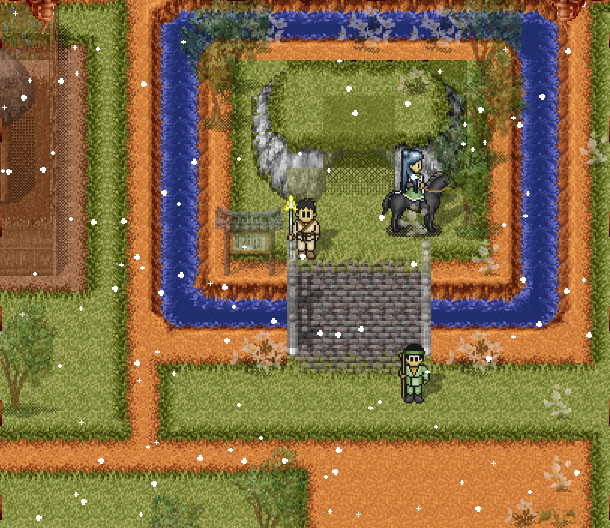

In [98]:
screenshot = pyautogui.screenshot(region=region, allScreens=True)
screenshot_cut = capture_and_crop(screenshot, (22,30,610,528))
screenshot_cut

In [99]:
610/17

35.88235294117647

In [100]:
528/14

37.714285714285715

In [104]:
screenshot = pyautogui.screenshot(region=region, allScreens=True)

me_template_paths = ['me_front.jpg','me_left.jpg','me_right.jpg','me_back.jpg','me_front2.jpg','me_left2.jpg','me_right2.jpg','me_back2.jpg']
mon_template_paths = ['cnghost_front.jpg','cnghost_left.jpg','cnghost_right.jpg','cnghost_back.jpg']

me_coord = image_detection(screenshot, me_template_paths, confidence=0.7, show=False)
mon_coord = image_detection(screenshot, mon_template_paths, confidence=0.7, show=False)

closest_monster = find_closest_coordinate(me_coord[0], mon_coord)

target_x = round((region[0] + closest_monster[0])/0.8)
target_y = round((region[1] + closest_monster[1])/0.8) - 1350

pyautogui.moveTo(target_x, target_y, duration=0.1)  # 마우스 이동 (0.5초 동안 이동)
pyautogui.click()

In [69]:
screenshot = pyautogui.screenshot(region=region, allScreens=True)
screenshot_cut = capture_and_crop(screenshot, (22,30,610,528))
screenshot_np = np.array(screenshot_cut)  # PIL 이미지를 NumPy 배열로 변환 (BGR 형식)
screenshot_np = cv2.cvtColor(screenshot_np, cv2.COLOR_RGB2BGR)  # RGB → BGR 변환

confidence = 0.8

me_template_paths = ['me_front.jpg','me_left.jpg','me_right.jpg','me_back.jpg','me_front2.jpg','me_left2.jpg','me_right2.jpg','me_back2.jpg']
mon_template_paths = ['cnghost_front.jpg','cnghost_left.jpg','cnghost_right.jpg','cnghost_back.jpg']

r_coordinates = []
r_cen_coordinates = []
# 템플릿 이미지 읽기
for template_path in me_template_paths:
    template = cv2.imread(template_path, cv2.IMREAD_UNCHANGED)
    h, w = template.shape[:2]  # 높이와 너비 가져오기
    # 템플릿 매칭
    result = cv2.matchTemplate(screenshot_np, template, cv2.TM_CCOEFF_NORMED)
    locations = np.where(result >= confidence)  # 매칭된 위치 추출 (신뢰도 기준)
    coordinates = list(zip(locations[1], locations[0]))
    for coordinate in coordinates:
        r_coordinates.append(coordinate)
        r_cen_coordinates.append((round(coordinate[0] + w // 2), round(coordinate[1] + h // 2)))
me_cen_coordinates = merge_close_coordinates(r_cen_coordinates)  

r_coordinates = []
r_cen_coordinates = []
for template_path in mon_template_paths:
    template = cv2.imread(template_path, cv2.IMREAD_UNCHANGED)
    h, w = template.shape[:2]  # 높이와 너비 가져오기
    # 템플릿 매칭
    result = cv2.matchTemplate(screenshot_np, template, cv2.TM_CCOEFF_NORMED)
    locations = np.where(result >= confidence)  # 매칭된 위치 추출 (신뢰도 기준)
    coordinates = list(zip(locations[1], locations[0]))
    for coordinate in coordinates:
        r_coordinates.append(coordinate)
        r_cen_coordinates.append((round(coordinate[0] + w // 2), round(coordinate[1] + h // 2)))
mon_cen_coordinates = merge_close_coordinates(r_cen_coordinates)  

closest_monster = find_closest_coordinate(me_cen_coordinates[0], mon_cen_coordinates)

target_x = round((region[0] + closest_monster[0] + 22)/0.8)
target_y = round((region[1] + closest_monster[1] + 30)/0.8) - 1350

pyautogui.moveTo(target_x, target_y, duration=0.1)  # 마우스 이동 (0.5초 동안 이동)
pyautogui.click()

In [66]:
me_cen_coordinates

[(485, 148)]

In [67]:
mon_cen_coordinates

[(306, 71)]

In [68]:
pyautogui.moveTo((800+485)/0.8, (169 + 148)/0.8-1350, duration=0.1)  # 마우스 이동 (0.5초 동안 이동)
pyautogui.click()

In [ ]:
closest_monster

(800, 169, 960, 720)

In [39]:
me_cen_coordinates

[(485, 399)]

In [44]:
target_x

1410

In [45]:
target_y

-832

In [43]:
closest_monster

(306, 215)

In [35]:
closest_monster

(90, 215)

In [70]:
coordinate

(299, 91)

In [62]:
screenshot = pyautogui.screenshot(region=region, allScreens=True)
screenshot_cut = capture_and_crop(screenshot, (22,30,610,528))
screenshot_np = np.array(screenshot_cut)
screenshot_np = cv2.cvtColor(screenshot_np, cv2.COLOR_RGB2BGR)  # RGB → BGR 변환

confidence = 0.8

template_paths = ['me_front.jpg','me_left.jpg','me_right.jpg','me_back.jpg','me_front2.jpg','me_left2.jpg','me_right2.jpg','me_back2.jpg']
r_coordinates = []
r_cen_coordinates = []
# 템플릿 이미지 읽기
for template_path in template_paths:
    template = cv2.imread(template_path, cv2.IMREAD_UNCHANGED)
    h, w = template.shape[:2]  # 높이와 너비 가져오기
    if template is None:
        raise FileNotFoundError(f"Template image not found: {template_path}")

    # 템플릿 매칭
    result = cv2.matchTemplate(screenshot_np, template, cv2.TM_CCOEFF_NORMED)
    locations = np.where(result >= confidence)  # 매칭된 위치 추출 (신뢰도 기준)
    coordinates = list(zip(locations[1], locations[0]))
    for coordinate in coordinates:
        r_coordinates.append((coordinate[0], w, h))
        r_cen_coordinates.append((round(coordinate[0] + w // 2), round(coordinate[1] + h // 2)))

r_coordinates = merge_close_coordinates(r_coordinates)  
me_cen_coordinates = merge_close_coordinates(r_cen_coordinates)  
        
for pt in r_coordinates:
    cv2.rectangle(screenshot_np, pt, (pt[0][0] + pt[1], pt[0][1] + pt[2]), (0, 255, 0), 1)
for pt in r_cen_coordinates:
    cv2.rectangle(screenshot_np, pt, (pt[0] + 1, pt[1] + 1), (0, 128, 0), 5)
    
cv2.imshow('Matches', screenshot_np)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [63]:
screenshot = pyautogui.screenshot(region=region, allScreens=True)
screenshot_cut = capture_and_crop(screenshot, (22,30,610,528))
screenshot_np = np.array(screenshot_cut)
screenshot_np = cv2.cvtColor(screenshot_np, cv2.COLOR_RGB2BGR)  # RGB → BGR 변환

confidence = 0.8

template_paths = ['cnghost_front.jpg','cnghost_left.jpg','cnghost_right.jpg','cnghost_back.jpg']
r_coordinates = []
r_cen_coordinates = []
# 템플릿 이미지 읽기
for template_path in template_paths:
    template = cv2.imread(template_path, cv2.IMREAD_UNCHANGED)
    h, w = template.shape[:2]  # 높이와 너비 가져오기
    if template is None:
        raise FileNotFoundError(f"Template image not found: {template_path}")

    # 템플릿 매칭
    result = cv2.matchTemplate(screenshot_np, template, cv2.TM_CCOEFF_NORMED)
    locations = np.where(result >= confidence)  # 매칭된 위치 추출 (신뢰도 기준)
    coordinates = list(zip(locations[1], locations[0]))
    for coordinate in coordinates:
        r_coordinates.append(coordinate)
        r_cen_coordinates.append((round(coordinate[0] + w // 2), round(coordinate[1] + h // 2)))

r_coordinates = merge_close_coordinates(r_coordinates)  
mon_cen_coordinates = merge_close_coordinates(r_cen_coordinates)  
        
for pt in r_coordinates:
    cv2.rectangle(screenshot_np, pt, (pt[0] + w, pt[1] + h), (0, 255, 0), 1)
for pt in r_cen_coordinates:
    cv2.rectangle(screenshot_np, pt, (pt[0] + 1, pt[1] + 1), (0, 128, 0), 5)
    
cv2.imshow('Matches', screenshot_np)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [30]:
me_cen_coordinates

[(90, 215)]

In [31]:
mon_cen_coordinates

[(305, 291), (233, 431)]

In [46]:
find_closest_coordinate(me_cen_coordinates[0], mon_cen_coordinates)

(340, 189)